<a href="https://colab.research.google.com/github/Vitalii1982-42/CodeGPT/blob/master/%D0%92%D0%B5%D0%B1%D0%B8%D0%BD%D0%B0%D1%80_26_%D0%BD%D0%BE%D1%8F%D0%B1%D1%80%D1%8F_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Установка и импорт библиотек
!pip install torchviz
!pip install torch torchvision # Устанавливаем PyTorch и библиотеку torchvision для работы с изображениями
import torch # Импортируем основную библиотеку PyTorch
import torchvision # Импортируем библиотеку torchvision
# Импортируем необходимые модули для визуализации
import torchviz
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn  # Импортируем модуль для создания нейронных сетей
import torch.nn.functional as F  # Импортируем модуль для функций активации и других операций
import torch.optim as optim  # Импортируем модуль для оптимизаторов
import numpy as np # Импортируем библиотеку NumPy
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torchviz import make_dot
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from IPython.display import Image
clear_output() # очистка вывода

## **1. PyTorch - фреймворк для глубокого обучения**

PyTorch — это фреймворк для глубокого обучения, разработанный Facebook's AI Research lab (FAIR). Он используется как для исследований, так и для разработки приложений.

**Преимущества PyTorch:**
- **Динамическое построение графов вычислений**: PyTorch использует динамическое построение графов, что упрощает отладку и делает код более интуитивным.
- **Интуитивный синтаксис**: PyTorch имеет синтаксис, схожий с NumPy, что делает его легким для изучения и использования.
- **Активное сообщество и поддержка**: PyTorch имеет большое и активное сообщество, что означает наличие множества ресурсов и библиотек.

**Недостатки PyTorch:**
- **Меньшая экосистема**: Хотя PyTorch быстро развивается, его экосистема может быть менее обширной по сравнению с TensorFlow.
- **Отсутствие встроенной поддержки распределенных вычислений**: PyTorch имеет менее развитую поддержку распределенных вычислений по сравнению с TensorFlow.

PyTorch используется многими исследователями и разработчиками в области искусственного интеллекта. Его простота, гибкость и мощные возможности делают его отличным выбором для тех, кто хочет начать работать с машинным обучением и глубокими нейронными сетями, поэтому в данном уроке мы рассмотрим задачи именно на нём.

## **2. Работа с датасетом MNIST в PyTorch**

MNIST (Modified National Institute of Standards and Technology) — это один из самых известных и широко используемых датасетов в области машинного обучения и компьютерного зрения. Датасет MNIST состоит из изображений рукописных цифр от 0 до 9, которые были собраны из различных источников, включая Национальный институт стандартов и технологий США (NIST). Каждое изображение в датасете имеет размер 28x28 пикселей и представлено в градациях серого.

### Почему MNIST используется для обучения нейронных сетей

MNIST является популярным выбором для обучения и тестирования нейронных сетей по нескольким причинам:

1. **Простота и доступность**: Изображения в MNIST имеют небольшой размер (28x28 пикселей), что делает их удобными для обработки и анализа.
2. **Стандартизированный набор данных**: MNIST используется в качестве эталона для сравнения производительности различных моделей и алгоритмов.
3. **Разнообразие данных**: Датасет содержит изображения, написанные разными людьми, что обеспечивает разнообразие стилей написания цифр.
4. **Широкая поддержка**: MNIST поддерживается многими библиотеками и фреймворками для машинного обучения, такими как PyTorch, TensorFlow и Keras.

### Структура данных в MNIST

Датасет MNIST состоит из двух частей: тренировочного набора (60,000 изображений) и тестового набора (10,000 изображений). Каждое изображение представлено в виде массива размером 28x28, где каждый элемент массива соответствует значению яркости пикселя (от 0 до 255). Метки представляют собой целые числа от 0 до 9, указывающие, какую цифру изображает данное изображение.

В этом разделе мы рассмотрим, как загрузить и предобработать данные MNIST, создать и обучить простую нейронную сеть, а также оценить её производительность.

### Шаг 1: Настройка окружения
Сначала нам нужно настроить наше окружение в Google Colab и установить необходимые библиотеки.


In [ ]:
# Устанавливаем библиотеки PyTorch и torchvision
!pip install torch torchvision

### Шаг 2: Импорт необходимых библиотек
Теперь мы импортируем все необходимые библиотеки для работы с PyTorch и загрузки данных.


In [ ]:
# Импортируем библиотеки
import torch  # Импортируем основную библиотеку PyTorch
import torch.nn as nn  # Импортируем модуль для работы с нейронными сетями
import torch.optim as optim  # Импортируем модуль для оптимизации параметров
from torch.utils.data import DataLoader  # Импортируем DataLoader для работы с загрузкой данных
from torchvision import datasets, transforms  # Импортируем наборы данных и трансформации из torchvision
import matplotlib.pyplot as plt  # Импортируем библиотеку для построения графиков
import numpy as np  # Импортируем библиотеку для работы с массивами и числовыми операциями

### Шаг 3: Загрузка и предобработка данных MNIST
Мы будем использовать библиотеку torchvision для загрузки и предобработки данных MNIST. Этот датасет содержит изображения рукописных цифр, которые мы будем использовать для обучения нашей нейронной сети.


In [ ]:
# Определяем трансформации для предобработки данных
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразуем изображения в тензоры. Это необходимо для работы с PyTorch, так как все данные должны быть в формате тензоров.
    transforms.Normalize((0.5,), (0.5,))  # Нормализуем данные. Преобразуем диапазон значений пикселей с [0, 1] в [-1, 1] с использованием среднего значения 0.5 и стандартного отклонения 0.5.
])

# Загружаем тренировочный и тестовый наборы данных MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)  # Загружаем тренировочный набор данных с применением трансформаций
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)  # Загружаем тестовый набор данных с применением трансформаций

# Создаем загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Создаем загрузчик данных для тренировочного набора с размером батча 64 и перемешиванием данных
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)  # Создаем загрузчик данных для тестового набора с размером батча 64 с перемешиванием данных

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5117501.89it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133649.28it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1273846.81it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9769501.93it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Шаг 4: Определение архитектуры нейронной сети
Теперь мы определим простую нейронную сеть, используя nn.Module. Наша сеть будет состоять из нескольких слоев, включая сверточные и полносвязные слои.


**Примеры функций активации:**

self.relu = nn.ReLU() - Функция активации ReLU

self.sigmoid = nn.Sigmoid() - Функция активации Sigmoid

self.tanh = nn.Tanh() - Функция активации Tanh

**Примеры дополнительных слоев**

self.dropout = nn.Dropout(p=0.5) - Слой Dropout с вероятностью 0.5

self.batch_norm = nn.BatchNorm1d(128) - Слой Batch Normalization

**Пример применения в методе прямого распространения**

x = self.fc1(x) - Первый слой

x = self.batch_norm(x) - Применяем Batch Normalization

x = self.sigmoid(x) - Применяем sigmoid

x = self.dropout(x) - Применяем Dropout

In [ ]:
class SimpleNN(nn.Module):
    """
    Класс, определяющий простую полносвязную нейронную сеть, наследуется от nn.Module.

    Атрибуты:
    fc1 - первый полносвязный слой
    fc2 - второй полносвязный слой
    fc3 - третий полносвязный слой
    relu - функция активации ReLU
    """
    def __init__(self): # это метод-конструктор класса. Он вызывается автоматически при создании нового экземпляра класса - self.
        super(SimpleNN, self).__init__() # используется для вызова методов базового класса, первый аргумент указывает на текущий класс (SimpleNN), а второй аргумент (self) — это экземпляр текущего класса
        self.fc1 = nn.Linear(28 * 28, 128)  # Первый полносвязный слой с входом 28*28 и выходом 128 нейронов
        self.fc2 = nn.Linear(128, 64)  # Второй полносвязный слой с входом 128 и выходом 64 нейрона
        self.fc3 = nn.Linear(64, 10)  # Третий полносвязный слой с входом 64 и выходом 10 нейронов (количество классов)
        self.relu = nn.ReLU()  # Функция активации ReLU, обнуляет выходные значения активации нейронов, если они отрицательные

    def forward(self, x):
        """
        Метод, определяющий прямое распространение (forward pass) через нейронную сеть.

        Параметры:
        x - входной тензор

        Возвращает:
        Результат прохождения через все слои сети
        """
        x = x.view(-1, 28 * 28)  # Преобразуем входные данные (изображение) в вектор. Параметр -1 позволяет PyTorch автоматически определять размер первой размерности (например, размер пакета).
        x = self.relu(self.fc1(x))  # Применяем ReLU к первому слою
        x = self.relu(self.fc2(x))  # Применяем ReLU ко второму слою
        x = self.fc3(x)  # Применяем третий полносвязный слой
        return x

### Шаг 5: Инициализация модели, функции потерь и оптимизатора
Теперь мы инициализируем нашу модель, определим функцию потерь и выберем оптимизатор для обучения.


In [ ]:
# Инициализируем модель (создаем экземпляр класса SimpleNN)
model = SimpleNN()

# Определяем функцию потерь
criterion = nn.CrossEntropyLoss() # измеряет, насколько хорошо работает модель, путем сравнения предсказанных выходов модели с истинными метками

# Выбираем оптимизатор
optimizer = optim.Adam(model.parameters(), lr=0.001) # используется для обновления весов модели на основе градиентов, вычисленных во время обратного распространения

### Шаг 6: Обучение нейронной сети
Теперь мы обучим нашу нейронную сеть на тренировочном наборе данных. Мы будем выполнять несколько эпох обучения, в каждой из которых будем проходить через все тренировочные данные.


In [ ]:
def train_model_with_gradients(model, train_loader, criterion, optimizer, num_epochs=10):
    """
    Функция для обучения модели и сохранения градиентов на каждом шаге.

    Входные параметры:
    model - модель нейронной сети (экземпляр nn.Module)
    train_loader - загрузчик тренировочных данных (DataLoader)
    criterion - функция потерь (nn.CrossEntropyLoss)
    optimizer - оптимизатор (optim.Adam)
    num_epochs - количество эпох обучения (по умолчанию 10)

    Возвращаемые значения:
    gradients - список градиентов для каждого слоя на каждом шаге
    layer_names - список имен слоев модели
    """
    gradients = []  # Создаем список для хранения градиентов
    layer_names = [name for name, _ in model.named_parameters()]  # Сохраняем имена слоев для легенды графика
    model.train()  # Устанавливаем модель в режим обучения

    for epoch in range(num_epochs):  # Проходимся по количеству эпох
        running_loss = 0.0  # Инициализируем переменную для накопления потерь
        for images, labels in train_loader:  # Проходимся по всем батчам в загрузчике данных
            optimizer.zero_grad()  # Обнуляем градиенты перед каждым шагом обучения
            outputs = model(images)  # Прямой проход (forward pass): вычисляем выходные значения модели
            loss = criterion(outputs, labels)  # Вычисляем потери между предсказанными и реальными значениями
            loss.backward()  # Обратный проход (backward pass): вычисляем градиенты

            # Сохраняем значения градиентов
            gradients.append([param.grad.abs().mean().item() for param in model.parameters() if param.grad is not None])  # Сохраняем среднее значение абсолютного значения градиента для каждого параметра

            optimizer.step()  # Шаг оптимизации: обновляем параметры модели на основе вычисленных градиентов
            running_loss += loss.item() * images.size(0)  # Накопление потерь для текущего батча, умноженное на размер батча

        epoch_loss = running_loss / len(train_loader.dataset)  # Вычисляем средние потери за эпоху
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')  # Выводим номер эпохи и средние потери

    return gradients, layer_names  # Возвращаем сохраненные градиенты и имена слоев


# Обучаем модель
gradients, layer_names = train_model_with_gradients(model, train_loader, criterion, optimizer, num_epochs=10)  # Обучаем модель и получаем градиенты и имена слоев

Epoch [1/10], Loss: 0.3892
Epoch [2/10], Loss: 0.1901
Epoch [3/10], Loss: 0.1371
Epoch [4/10], Loss: 0.1113
Epoch [5/10], Loss: 0.0950
Epoch [6/10], Loss: 0.0810
Epoch [7/10], Loss: 0.0720
Epoch [8/10], Loss: 0.0646
Epoch [9/10], Loss: 0.0588
Epoch [10/10], Loss: 0.0542


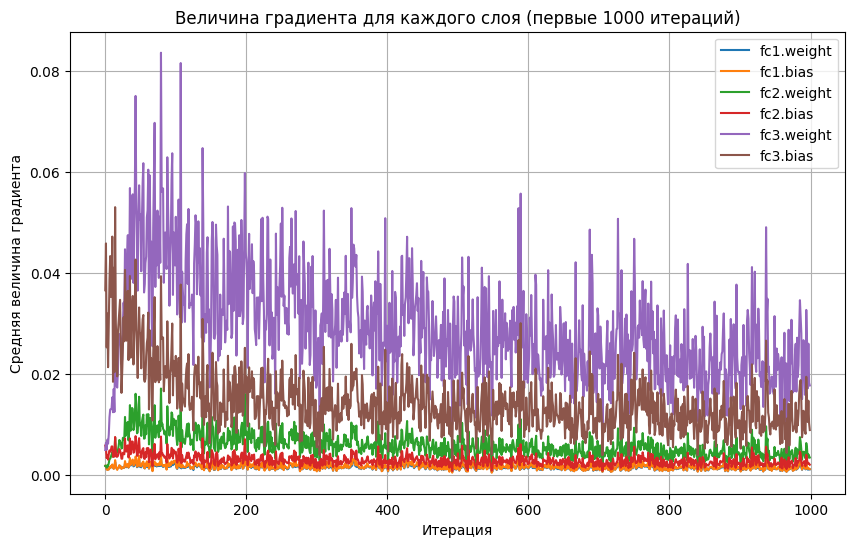

In [ ]:
#@title Визуализация изменения значений градиента (насколько нужно изменить каждый параметр, чтобы минимизировать потери) в процессе обучения
plt.figure(figsize=(10, 6))  # Создаем фигуру для визуализации размером 10x6 дюймов
iterations = np.arange(len(gradients))  # Создаем массив с номерами итераций
max_iterations = min(1000, len(gradients))  # Устанавливаем лимит на количество итераций для отображения, чтобы не превышать общее количество итераций

for i in range(len(gradients[0])):
    plt.plot(iterations[:max_iterations], [grad[i] for grad in gradients[:max_iterations]], label=layer_names[i])  # Строим график для каждого параметра с осмысленными именами, ограничивая количество итераций

plt.xlabel('Итерация')  # Подпись оси X
plt.ylabel('Средняя величина градиента')  # Подпись оси Y
plt.title('Величина градиента для каждого слоя (первые 1000 итераций)')  # Заголовок графика
plt.legend()  # Отображение легенды для графиков слоев
plt.grid(True)  # Включение сетки на графике
plt.show()  # Отображение графика

### Шаг 7: Оценка модели
После обучения мы оценим нашу модель на тестовом наборе данных и визуализируем предсказания.


In [ ]:
#@title Функция для оценки модели
def evaluate_model(model, test_loader):
    """
    Функция для оценки точности модели на тестовом наборе данных.

    Входные параметры:
    model - модель нейронной сети (экземпляр nn.Module), которую нужно оценить
    test_loader - загрузчик тестовых данных (DataLoader), содержащий тестовые изображения и метки

    Возвращает:
    Ничего не возвращает. Печатает точность модели на тестовых изображениях.
    """
    model.eval()  # Устанавливаем модель в режим оценки
    correct = 0  # Счетчик правильных предсказаний
    total = 0  # Общее количество образцов

    with torch.no_grad():  # Отключаем вычисление градиентов
        for images, labels in test_loader:  # Проходимся по тестовым данным (изображения, истинные метки)
            outputs = model(images)  # Прямой проход
            _, predicted = torch.max(outputs.data, 1)  # Находим класс с максимальным значением индекса для каждого изображения в батче
            total += labels.size(0)  # Считаем общее количество образцов
            correct += (predicted == labels).sum().item()  # Считаем количество правильных предсказаний

    accuracy = 100 * correct / total  # Вычисляем точность
    print(f'Точность модели на тестовых изображениях: {accuracy:.2f}%')  # Выводим точность

In [ ]:
# Оцениваем модель
evaluate_model(model, test_loader)  # Запускаем процесс оценки модели на тестовом наборе данных

Точность модели на тестовых изображениях: 97.47%


### Шаг 8: Визуализация предсказаний
Мы визуализируем несколько изображений из тестового набора данных вместе с их предсказанными и реальными метками.


In [ ]:
#@title Функция визуализации предсказаний
# Список с названиями классов MNIST
classes = [str(i) for i in range(10)]  # Список строк с номерами классов от 0 до 9

# Функция для визуализации предсказаний
def visualize_predictions(model, test_loader, num_images=6):
    model.eval()  # Устанавливаем модель в режим оценки
    images, labels = next(iter(test_loader))  # Получаем одну партию изображений и меток
    outputs = model(images)  # Прямой проход
    _, predicted = torch.max(outputs, 1)  # Получаем предсказанные классы
    images = images.numpy()  # Преобразуем изображения в numpy массив

    # Визуализируем изображения
    fig, axes = plt.subplots(1, num_images, figsize=(12, 6))  # Создаем фигуру с подграфиками
    for i in range(num_images):  # Проходимся по изображениям
        axes[i].imshow(images[i].squeeze(), cmap='gray')  # Отображаем изображение
        axes[i].set_title(f'Предсказано: {classes[predicted[i]]}\nВерно: {classes[labels[i]]}')  # Заголовок с классами
        axes[i].axis('off')  # Отключаем оси
    plt.show()  # Показываем фигуру

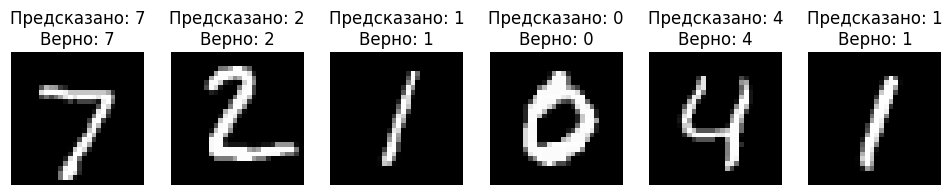

In [ ]:
# Визуализируем предсказания
visualize_predictions(model, test_loader)  # Запускаем визуализацию предсказаний

### Заключение
Мы успешно создали и обучили нейронную сеть на датасете MNIST. Мы прошли через все шаги, начиная с загрузки данных и заканчивая оценкой модели и визуализацией предсказаний. Теперь у вас есть базовое понимание того, как работать с PyTorch и обучать нейронные сети на различных датасетах.


## **3. Использование предобученной модели ResNet18 c PyTorch для классификации рентгеновских снимков легких**

### Описание датасета рентгеновских снимков легких

Датасет содержит рентгеновские снимки легких с пневмонией и без. Изображения рассортированы по классам и организованы в соответствующие папки. Датасет используется для обучения модели классификации рентгеновских снимков легких.

#### Структура датасета

- **NORMAL**
  - Количество изображений: 1341
- **PNEUMONIA**
  - Количество изображений: 3875

**Общее количество изображений**: 5216

В нашем примере мы будем использовать предобученную ResNet18 для классификации рентгеновских снимков легких с пневмонией и без.

### Шаг 1: Настройка окружения

Сначала нам нужно настроить наше окружение в Google Colab и установить необходимые библиотеки.


In [ ]:
# Устанавливаем библиотеки PyTorch и torchvision
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

### Шаг 2: Импорт необходимых библиотек

Теперь мы импортируем все необходимые библиотеки для работы с PyTorch и загрузки данных.

In [ ]:
# Импортируем необходимые библиотеки
import torch  # Библиотека для работы с тензорами и обучением моделей в PyTorch
import torch.nn as nn  # Модуль для определения нейронных сетей в PyTorch
import torch.optim as optim  # Модуль для определения оптимизаторов в PyTorch
from torch.utils.data import DataLoader  # Класс для загрузки данных в мини-батчах
from torchvision import datasets, transforms, models  # Модули для работы с датасетами, преобразованиями и предобученными моделями
import matplotlib.pyplot as plt  # Библиотека для визуализации данных и результатов
import numpy as np  # Библиотека для работы с массивами и числовыми операциями
import gdown  # Утилита для загрузки файлов из Google Drive
import os  # Библиотека для работы с операционной системой (например, создание и удаление директорий)
import shutil  # Модуль для работы с файлами и директориями (например, копирование и удаление)
from sklearn.model_selection import train_test_split  # Функция для разделения данных на обучающую и тестовую выборки
from torchvision import transforms  # Модуль для определения преобразований изображений
from PIL import Image  # Библиотека для работы с изображениями

### Шаг 3: Загрузка и предобработка данных датасета рентгена легких



In [ ]:
#@title Функция загрузки датасета и его и разделения на тренировочную и тестовую выборки
# Функция для загрузки и разархивации датасета
def download_and_unzip_dataset(url, output_path, extract_to):
    gdown.download(url, output_path, quiet=True)
    !unzip -qo {output_path} -d {extract_to}
    print("Содержимое папки:", os.listdir(extract_to))

# Функция для разделения данных на тренировочные и тестовые наборы
def split_dataset(data_dir, train_dir, test_dir, test_size=0.2):
    # Проверяем, что папки для разделения существуют, и создаем их, если они отсутствуют
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    classes = os.listdir(data_dir)
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            if len(files) == 0:
                print(f"Категория {cls} пуста, пропускаем.")
                continue
            train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

            # Создаем папки для каждой категории в тренировочном и тестовом наборах
            train_class_dir = os.path.join(train_dir, cls)
            test_class_dir = os.path.join(test_dir, cls)
            if not os.path.exists(train_class_dir):
                os.makedirs(train_class_dir)
            if not os.path.exists(test_class_dir):
                os.makedirs(test_class_dir)

            # Копируем файлы в соответствующие папки
            for file in train_files:
                shutil.move(os.path.join(class_dir, file), os.path.join(train_class_dir, file))
            for file in test_files:
                shutil.move(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

In [ ]:
# URL для загрузки датасета
dataset_url = 'https://drive.google.com/uc?id=1iHp9lxKFcHt1fBDv66ShB46LVn-8zRjE'
output_path = 'pneumonia.zip'
extract_to = '/content/pneumonia/'

# Вызов функции для загрузки и разархивации датасета
download_and_unzip_dataset(dataset_url, output_path, extract_to)

Содержимое папки: ['NORMAL', 'PNEUMONIA']


In [ ]:
# Пути к папкам для тренировочных и тестовых данных
train_dir = '/content/train'
test_dir = '/content/test'

# Определяем метки классов
classes = ['NORMAL', 'PNEUMONIA']  # Метки классов

# Вызов функции для разделения данных на тренировочные и тестовые наборы
split_dataset(extract_to, train_dir, test_dir)

# Проверяем содержимое папок после разделения
print("Содержимое папки train:", os.listdir(train_dir))
print("Содержимое папки test:", os.listdir(test_dir))

Содержимое папки train: ['NORMAL', 'PNEUMONIA']
Содержимое папки test: ['NORMAL', 'PNEUMONIA']


In [ ]:
# Определяем трансформации для предобработки данных
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Изменяем размер изображений до 224x224 пикселей
    transforms.ToTensor(),  # Преобразуем изображения в тензоры
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Нормализуем данные (средние и стандартные отклонения для ImageNet)
])

# Загружаем тренировочный и тестовый наборы данных
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)  # Тренировочный набор данных с применением трансформаций
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)  # Тестовый набор данных с применением трансформаций

# Создаем загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Загрузчик для тренировочного набора данных с размером батча 32 и перемешиванием
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Загрузчик для тестового набора данных с размером батча 32 без перемешивания

# Выводим информацию о размерах наборов данных
print(f'Размер тренировочного набора: {len(train_dataset)} изображений')  # Вывод размера тренировочного набора данных
print(f'Размер тестового набора: {len(test_dataset)} изображений')  # Вывод размера тестового набора данных

Размер тренировочного набора: 4172 изображений
Размер тестового набора: 1044 изображений


### Шаг4: Использование предобученной модели

Мы будем использовать предобученную модель `ResNet18` и настроим ее для нашей задачи классификации.



In [ ]:
# Загружаем предобученную модель ResNet18
model = models.resnet18(pretrained=True)  # Загружаем модель ResNet18, предобученную на ImageNet

# Заменяем последний слой для классификации на 2 класса (NORMAL, PNEUMONIA)
num_features = model.fc.in_features  # Получаем количество входных признаков последнего слоя
model.fc = nn.Linear(num_features, 2)  # Заменяем последний слой на линейный слой с 2 выходами (для 2 классов)

# Перемещаем модель на устройство (GPU, если доступно)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Определяем устройство для вычислений (GPU или CPU)
model = model.to(device)  # Перемещаем модель на выбранное устройство

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


### Шаг 5: Инициализация функции потерь и оптимизатора

Мы определим функцию потерь и выберем оптимизатор для обучения нашей модели.

In [ ]:
# Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()  # Используем функцию потерь CrossEntropyLoss для задачи классификации
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Используем оптимизатор Adam с начальными параметрами последнего слоя модели и скоростью обучения 0.001

### Шаг 6: Обучение модели

Теперь мы обучим нашу нейронную сеть на тренировочном наборе данных.

In [ ]:
# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()  # Устанавливаем модель в режим обучения
        running_loss = 0.0  # Инициализируем переменную для накопления потерь за эпоху
        for images, labels in train_loader:  # Проходим по батчам данных из загрузчика данных
            images, labels = images.to(device), labels.to(device)  # Переносим изображения и метки на устройство (GPU или CPU)
            optimizer.zero_grad()  # Обнуляем градиенты предыдущих итераций
            outputs = model(images)  # Прямой проход: получаем предсказания модели для текущего батча изображений
            loss = criterion(outputs, labels)  # Вычисляем потери между предсказаниями и реальными метками
            loss.backward()  # Обратный проход: вычисляем градиенты для всех параметров модели
            optimizer.step()  # Обновляем параметры модели с учетом вычисленных градиентов
            running_loss += loss.item() * images.size(0)  # Накопление потерь за текущий батч, умножаем на размер батча
        epoch_loss = running_loss / len(train_loader.dataset)  # Вычисляем среднюю потерю за всю эпоху
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')  # Выводим номер эпохи и среднюю потерю

# Обучаем модель
train_model(
    model,          # Модель, которую мы обучаем (экземпляр nn.Module)
    train_loader,   # Загрузчик тренировочных данных (DataLoader)
    criterion,      # Функция потерь, используемая для вычисления ошибки (nn.CrossEntropyLoss)
    optimizer,      # Оптимизатор, используемый для обновления весов модели (optim.Adam)
    device,         # Устройство, на котором производится вычисление (torch.device, например, 'cuda' или 'cpu')
    num_epochs=25   # Количество эпох для обучения (по умолчанию 25)
)  # Запускаем обучение модели на заданное число эпох


Epoch [1/25], Loss: 0.2487
Epoch [2/25], Loss: 0.1578
Epoch [3/25], Loss: 0.1450
Epoch [4/25], Loss: 0.1328
Epoch [5/25], Loss: 0.1310
Epoch [6/25], Loss: 0.1235
Epoch [7/25], Loss: 0.1219
Epoch [8/25], Loss: 0.1155
Epoch [9/25], Loss: 0.1122
Epoch [10/25], Loss: 0.1062
Epoch [11/25], Loss: 0.1043
Epoch [12/25], Loss: 0.1028
Epoch [13/25], Loss: 0.1168
Epoch [14/25], Loss: 0.1005
Epoch [15/25], Loss: 0.0947
Epoch [16/25], Loss: 0.1032
Epoch [17/25], Loss: 0.0945
Epoch [18/25], Loss: 0.0986
Epoch [19/25], Loss: 0.1004
Epoch [20/25], Loss: 0.0928
Epoch [21/25], Loss: 0.0901
Epoch [22/25], Loss: 0.0870
Epoch [23/25], Loss: 0.0974
Epoch [24/25], Loss: 0.0908
Epoch [25/25], Loss: 0.0964


### Шаг 7: Оценка модели

После обучения мы оценим нашу модель на тестовом наборе данных и визуализируем предсказания.

In [ ]:
#@title Функция для оценки модели
def evaluate_model(model, test_loader, criterion, device):
    model.eval()  # Устанавливаем модель в режим оценки
    test_loss = 0.0
    correct = 0  # Инициализируем переменную для подсчета правильных предсказаний
    total = 0  # Инициализируем переменную для подсчета общего числа образцов
    with torch.no_grad():  # Отключаем вычисление градиентов, так как они не нужны для оценки
        for images, labels in test_loader:  # Проходим по батчам данных из загрузчика тестовых данных
            images, labels = images.to(device), labels.to(device)  # Переносим изображения и метки на устройство (GPU или CPU)
            outputs = model(images)  # Прямой проход: получаем предсказания модели для текущего батча изображений
            loss = criterion(outputs, labels)  # Вычисляем потери
            test_loss += loss.item() * images.size(0)  # Накопление потерь за текущий батч, умножаем на размер батча
            _, predicted = torch.max(outputs.data, 1)  # Получаем предсказания, выбирая класс с максимальной вероятностью
            total += labels.size(0)  # Увеличиваем общее количество образцов
            correct += (predicted == labels).sum().item()  # Увеличиваем количество правильных предсказаний
    accuracy = 100 * correct / total  # Вычисляем точность модели в процентах
    test_loss = test_loss / total  # Вычисляем среднюю потерю на тестовом наборе данных
    print(f'Ошибка: {test_loss:.4f}, Точность: {accuracy:.2f}%')  # Выводим потери и точность модели

In [ ]:
# Оцениваем модель
evaluate_model(
    model,  # Модель, которую мы оцениваем
    test_loader,  # Загрузчик данных для тестового набора
    criterion,  # Функция потерь, используемая для вычисления ошибки
    device  # Устройство, на котором производится вычисление (GPU или CPU)
)

Ошибка: 0.0823, Точность: 96.17%


### Шаг 8: Визуализация предсказаний

Мы визуализируем несколько изображений из тестового набора данных вместе с их предсказанными и реальными метками.


In [ ]:
#@title Функция для визуализации изображений
def visualize_images_from_folder(model, folder_path, class_names, folder_name, num_images=6):
    model.eval()  # Устанавливаем модель в режим оценки

    # Создаем список изображений из папки
    image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)
                   if fname.endswith(('.png', '.jpg', '.jpeg'))]  # Получаем пути ко всем изображениям в папке
    if len(image_paths) == 0:  # Проверяем, есть ли изображения в папке
        print(f"No images found in {folder_path}.")
        return

    # Применяем трансформации к изображениям
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Изменяем размер изображения до 224x224 пикселей
        transforms.ToTensor(),  # Преобразуем изображение в тензор
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализуем изображение
    ])

    # Визуализируем изображения
    fig = plt.figure(figsize=(12, 6))  # Создаем фигуру для визуализации
    for i, img_path in enumerate(image_paths[:num_images]):  # Цикл по изображениями (максимум num_images)
        image = Image.open(img_path)  # Открываем изображение

        # Проверка на количество каналов и преобразование в трехканальное изображение
        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_tensor = transform(image).unsqueeze(0).to(device)  # Применяем трансформации и перемещаем на устройство

        with torch.no_grad():  # Отключаем вычисление градиентов
            outputs = model(image_tensor)  # Пропускаем изображение через модель
            _, predicted = torch.max(outputs, 1)  # Получаем предсказанный класс

        image = image.convert('RGB')  # Конвертируем изображение в RGB для корректного отображения
        ax = fig.add_subplot(2, num_images // 2, i + 1, xticks=[], yticks=[])  # Добавляем подграфик
        ax.imshow(image)  # Отображаем изображение
        ax.set_title(f'Pred: {class_names[predicted.item()]}, True: {folder_name}')  # Устанавливаем заголовок с предсказанным и истинным классами

    plt.show()  # Отображаем фигуру

# Список названий классов для датасета пневмонии
class_names = ['NORMAL', 'PNEUMONIA']

# Пути к папкам
folders = {
    'NORMAL': '/content/test/NORMAL',  # Путь к папке с изображениями NORMAL
    'PNEUMONIA': '/content/test/PNEUMONIA'  # Путь к папке с изображениями PNEUMONIA
}

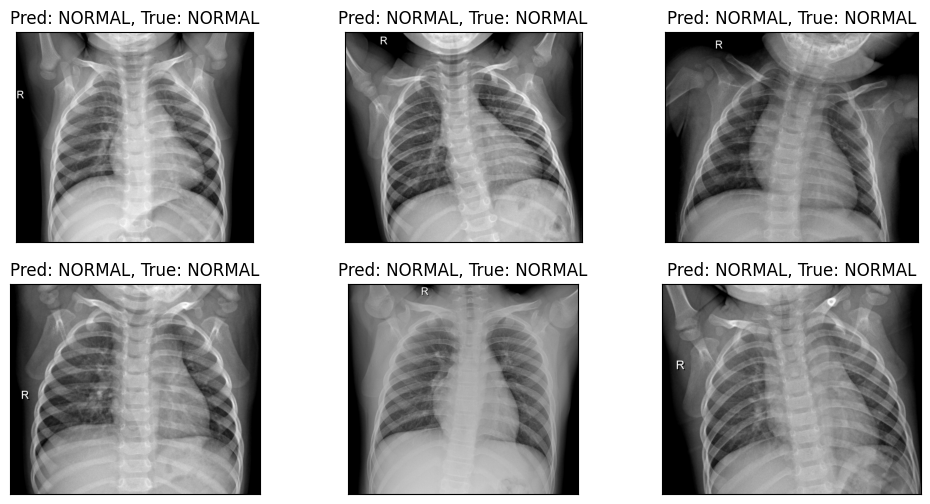

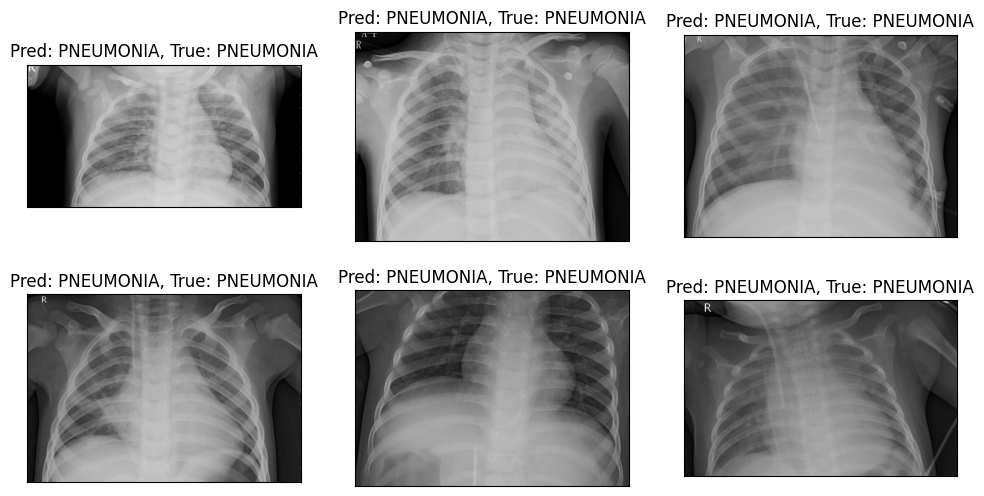

In [ ]:
# Визуализируем изображения из каждой папки
for folder_name, folder_path in folders.items():
    visualize_images_from_folder(
        model,  # Модель, которую мы используем для предсказания
        folder_path,  # Путь к папке с изображениями
        class_names,  # Список названий классов для датасета
        folder_name  # Название текущей папки (класс)
    )

Мы успешно применили предобученную модель ResNet18 для классификации рентгеновских снимков легких в датасете пневмонии. В процессе работы мы выполнили все ключевые этапы: от подготовки данных и их загрузки до настройки модели, ее обучения и оценки производительности. Мы также визуализировали предсказания модели, что позволило наглядно оценить ее результаты. Этот процесс демонстрирует, как можно эффективно использовать предобученные модели в PyTorch для решения задач классификации изображений.



## **4. Прогнозирование стоимости квартир с использованием PyTorch**


### Описание датасета квартир

Датасет содержит информацию о квартирах, представленных для продажи. Датасет используется для обучения модели, которая предсказывает стоимость квартиры.

#### Структура датасета

- **Количество квартир в выборке**: N (замените N на фактическое количество квартир после фильтрации)

**Поля в датасете**:
- **Цена, тыс.руб.**: Цена квартиры в тысячах рублей.
- **Тип дома**: Тип здания, в котором находится квартира (например, кирпичный, панельный и т.д.).
- **Балконы**: Количество балконов.
- **Лоджии**: Количество лоджий.
- **Станция метро**: Название ближайшей станции метро.
- **Пешком или на транспорте**: Указание на то, добираться ли до метро пешком или на транспорте.
- **Время в пути**: Время в пути до ближайшей станции метро (в минутах).
- **Площадь**: Общая площадь квартиры в квадратных метрах.
- **Этаж**: Этаж, на котором находится квартира.
- **Всего этажей в доме**: Общее количество этажей в здании.
- **Санузел**: Наличие и тип санузла (совмещенный, раздельный и т.д.).
- **Тип санузла**: Тип санузла (например, совмещенный, раздельный).
- **Примечание**: Дополнительная информация о квартире.

**Общее количество признаков**: 12

В нашем примере мы будем использовать нейронную сеть для предсказания стоимости квартиры на основе данных об однокомнатных квартирах стоимостью до 300 млн рублей.


### Шаг 1: Настройка окружения

Сначала нам нужно настроить наше окружение в Google Colab и установить необходимые библиотеки.


In [ ]:
# Устанавливаем библиотеки PyTorch и torchvision
!pip install gdown torch torchvision scikit-learn

### Шаг 2: Импорт необходимых библиотек

Теперь мы импортируем все необходимые библиотеки для работы с PyTorch и загрузки данных.

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd  # для работы с данными в формате DataFrame
import numpy as np  # для работы с массивами и числовыми операциями
import gdown  # для загрузки файлов из Google Drive
import warnings  # для управления предупреждениями
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler  # для предварительной обработки данных
from sklearn.model_selection import train_test_split  # для разделения данных на обучающую и тестовую выборки
import torch  # основной пакет для работы с PyTorch
import torch.nn as nn  # для определения нейронных сетей в PyTorch
import torch.optim as optim  # для определения оптимизаторов в PyTorch
from sklearn.feature_extraction.text import CountVectorizer  # для преобразования текстовых данных в числовые векторы
import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns  # для построения более сложных и эстетичных графиков
from IPython.display import clear_output  # для очистки вывода в IPython
from sklearn.metrics import mean_absolute_error  # для вычисления метрики средней абсолютной ошибки

### Шаг 3: Загрузка и предобработка данных датасета квартир

In [ ]:
#@title Функции загрузки датасета и предобработки данных
# Загрузка и распаковка данных
URL = 'https://storage.yandexcloud.net/terraai/sources/flats.zip'
download_filename = gdown.download(URL, None, quiet=True)
!unzip -q {download_filename} -d '/content/data'
!rm -rf {download_filename}

# Игнорирование предупреждений
warnings.filterwarnings("ignore", category=UserWarning)

#@title Загрузка данных
def load_data():
    df = pd.read_csv('/content/data/flats.csv')
    df.drop(columns=['Источник', 'Бонус агенту', 'Дата', 'Кол-во дней в экспозиции'], inplace=True)
    df = df[df['Цена, тыс.руб.'] <= 300_000]
    df = df[df['Комнат'] == 1]
    df.drop(columns=['Комнат'], inplace=True)
    return df

# Очистка вывода
clear_output()

#@title Преобразование текста в векторы
def text_to_vector(df, column, vector_size):
    vectorizer = CountVectorizer(max_features=vector_size, stop_words='english', token_pattern=r'\b\w+\b')
    text_vectors = vectorizer.fit_transform(df[column].astype('U')).toarray()
    text_vector_df = pd.DataFrame(text_vectors, columns=[f'{column}_vec_{i}' for i in range(vector_size)])
    df = pd.concat([df.reset_index(drop=True), text_vector_df.reset_index(drop=True)], axis=1)
    df.drop(columns=[column], inplace=True)
    return df

# Функция предобработки данных
def preprocess_data(df):
    # Обработка пропущенных значений
    df = df.dropna()

    # Список столбцов для OHE, исключаем 'Этаж' и 'Всего этажей в доме'
    categorical_columns = ['Тип дома', 'Балконы', 'Лоджии', 'Станция метро', 'Пешком или на транспорте', 'Санузел', 'Тип санузла']

    # Применение OHE
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=np.int8)

    # Нормирование столбцов Время в пути, Площадь, Этаж и Всего этажей в доме
    scaler_time = StandardScaler()
    scaler_area = StandardScaler()
    scaler_floor = StandardScaler()
    scaler_total_floors = StandardScaler()

    df[['Время в пути']] = scaler_time.fit_transform(df[['Время в пути']])
    df[['Площадь']] = scaler_area.fit_transform(df[['Площадь']])
    df[['Этаж']] = scaler_floor.fit_transform(df[['Этаж']])
    df[['Всего этажей в доме']] = scaler_total_floors.fit_transform(df[['Всего этажей в доме']])

    # Расчет средней стоимости до нормализации
    mean_price = df['Цена, тыс.руб.'].mean()

    return df, mean_price

#@title Нормирование целевых значений
def normalize_target(df):
    scaler_price = StandardScaler()
    df[['Цена, тыс.руб.']] = scaler_price.fit_transform(df[['Цена, тыс.руб.']])
    return df, scaler_price

#@title Разделение данных
def split_data(df, test_size):
    # Разделение данных на обучающую и тестовую выборки
    X = df.drop('Цена, тыс.руб.', axis=1)
    y = df['Цена, тыс.руб.']
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Загрузка данных
df = load_data()
df

,Станция метро,Время в пути,Пешком или на транспорте,Этаж,Всего этажей в доме,Тип дома,Балконы,Лоджии,Санузел,Тип санузла,Площадь,"Цена, тыс.руб.",Примечание
0,Шелепиха м.,12,Пешком,35,37,Монолитный,0,0,2,Не указано,64.1,19500.00,Собственность оформлена! Ключи на руках! Опера...
1,Пятницкое шоссе м.,30,На транспорте,11,14,Панельный,0,1,1,Раздельный,38.4,4800.00,Зеленоград к.1820 однокомнатная квартира общ.3...
2,Планерная м.,5,На транспорте,11,22,Панельный,1,0,1,Совмещенный,38.2,7990.00,"Уютная, светлая квартира, застекленный балкон ..."
3,Шаболовская м.,12,Пешком,8,12,Не указано,1,0,1,Раздельный,38.0,11200.00,"Предлагаю 1- комн квартиру, в шаговой доступно..."
4,Бабушкинская м.,15,Пешком,4,14,Панельный,0,0,1,Совмещенный,34.0,6250.00,Продается хорошая 1 комнатная квартира. 1 взро...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Некрасовка м.,4,Пешком,2,17,Панельный,0,0,1,Не указано,19.8,2850.00,Уникальнейшее предложение! 7 минуты до метро! ...
126264,Авиамоторная м.,6,Пешком,2,8,Кирпичный,0,0,1,Совмещенный,20.4,3839.99,ВЫГОДНОЕ ПРЕДЛОЖЕНИЕ в пешей доступности от ме...
126265,Коломенская м.,15,Пешком,1,9,Панельный,0,0,1,Не указано,15.4,2900.00,СТУДИЯ В МОСКВЕ ПО ДОСТУПНОЙ ЦЕНЕ ! __________...
126266,Алтуфьево м.,5,На транспорте,4,9,Монолитный,0,0,1,Не указано,26.0,5200.00,Продается студия с отделкой в новом монолитном...


In [ ]:
# Предобработка категориальных и числовых данных, расчет средней стоимости
df, mean_price = preprocess_data(df)

# Нормирование целевых значений
df, scaler_price = normalize_target(df)

# Преобразование текста в векторы
df = text_to_vector(df, 'Примечание', vector_size=1000)
df

,Время в пути,Этаж,Всего этажей в доме,Площадь,"Цена, тыс.руб.",Тип дома_Деревянный,Тип дома_Железо-бетонный,Тип дома_Кирпичный,Тип дома_Монолитный,Тип дома_Не указано,...,Примечание_vec_990,Примечание_vec_991,Примечание_vec_992,Примечание_vec_993,Примечание_vec_994,Примечание_vec_995,Примечание_vec_996,Примечание_vec_997,Примечание_vec_998,Примечание_vec_999
0,0.325092,2.856728,1.718539,1.132717,1.080862,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2.726350,0.117504,-0.419261,-0.118080,-0.418863,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.608731,0.117504,0.324321,-0.127814,-0.093412,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.325092,-0.224899,-0.605157,-0.137547,0.234079,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.725301,-0.681436,-0.419261,-0.332224,-0.270931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74649,-0.742134,-0.909705,-0.140418,-1.023325,-0.617806,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74650,-0.475328,-0.909705,-0.976948,-0.994124,-0.516805,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
74651,0.725301,-1.023839,-0.884000,-1.237470,-0.612704,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74652,-0.608731,-0.681436,-0.884000,-0.721577,-0.378054,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Разделение выборок на обучающую, валидационную и тестовую
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, test_size=0.2)

# Конвертация данных в numpy.ndarray
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# Вывод форм выборок
print(f'Форма X_train: {X_train.shape}')
print(f'Форма X_val: {X_val.shape}')
print(f'Форма X_test: {X_test.shape}')
print(f'Форма y_train: {y_train.shape}')
print(f'Форма y_val: {y_val.shape}')
print(f'Форма y_test: {y_test.shape}')

Форма X_train: (59723, 1291)
Форма X_val: (7465, 1291)
Форма X_test: (7466, 1291)
Форма y_train: (59723,)
Форма y_val: (7465,)
Форма y_test: (7466,)


### Шаг 4: Определение архитектуры нейронной сети
Теперь мы определим улучшенную нейронную сеть, используя nn.Module. Наша сеть будет состоять из нескольких полносвязных слоев с большим количеством нейронов, а также слоев Dropout для регуляризации. Мы также будем использовать функцию активации LeakyReLU для лучшей производительности.

In [ ]:
# Определение модели
class ImprovedRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 1024)  # Первый полносвязный слой с 1024 нейронами
        self.layer2 = nn.Linear(1024, 512)  # Второй полносвязный слой с 512 нейронами
        self.layer3 = nn.Linear(512, 256)  # Третий полносвязный слой с 256 нейронами
        self.layer4 = nn.Linear(256, 128)  # Четвертый полносвязный слой с 128 нейронами
        self.layer5 = nn.Linear(128, 64)  # Пятый полносвязный слой с 64 нейронами
        self.layer6 = nn.Linear(64, 32)  # Шестой полносвязный слой с 32 нейронами
        self.layer7 = nn.Linear(32, 1)  # Выходной полносвязный слой с 1 нейроном (для регрессии)
        self.leaky_relu = nn.LeakyReLU(0.1)  # Функция активации LeakyReLU с негативным наклоном 0.1
        self.dropout = nn.Dropout(0.3)  # Dropout слой с вероятностью 0.3 для регуляризации

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))  # Применяем первый полносвязный слой, затем LeakyReLU и Dropout
        x = self.dropout(x)  # Применяем Dropout
        x = self.leaky_relu(self.layer2(x))  # Применяем второй полносвязный слой, затем LeakyReLU и Dropout
        x = self.dropout(x)  # Применяем Dropout
        x = self.leaky_relu(self.layer3(x))  # Применяем третий полносвязный слой, затем LeakyReLU и Dropout
        x = self.dropout(x)  # Применяем Dropout
        x = self.leaky_relu(self.layer4(x))  # Применяем четвертый полносвязный слой, затем LeakyReLU и Dropout
        x = self.dropout(x)  # Применяем Dropout
        x = self.leaky_relu(self.layer5(x))  # Применяем пятый полносвязный слой, затем LeakyReLU и Dropout
        x = self.dropout(x)  # Применяем Dropout
        x = self.leaky_relu(self.layer6(x))  # Применяем шестой полносвязный слой, затем LeakyReLU
        x = self.layer7(x)  # Применяем выходной полносвязный слой
        return x  # Возвращаем выход модели

### Шаг 5: Инициализация модели, функции потерь и оптимизатора
Теперь мы инициализируем нашу модель, определим функцию потерь и выберем оптимизатор для обучения.

In [ ]:
# Инициализируем модель
model = ImprovedRegressionModel(X_train.shape[1])  # Создаем экземпляр регрессионной модели, передавая количество входных признаков (input_dim)

# Определяем функцию потерь
criterion = nn.MSELoss()  # Используем MSELoss (Mean Squared Error) в качестве функции потерь, так как у нас задача регрессии

# Выбираем оптимизатор
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Используем оптимизатор Adam с начальной скоростью обучения 0.001, который будет обновлять параметры модели

### Шаг 6: Обучение нейронной сети
Теперь мы обучим нашу нейронную сеть на тренировочном наборе данных. Мы будем выполнять до 200 эпох обучения, в каждой из которых будем проходить через все тренировочные данные. Мы также будем использовать метод раннего прекращения (early stopping), чтобы остановить обучение, если качество модели на валидационном наборе данных перестанет улучшаться.

In [ ]:
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs, patience=10):
    """
    Обучение модели.

    Параметры:
    model (nn.Module): Нейронная сеть для обучения.
    criterion (nn.Module): Функция потерь.
    optimizer (torch.optim.Optimizer): Оптимизатор.
    X_train (numpy.ndarray): Обучающие данные.
    y_train (numpy.ndarray): Метки обучающих данных.
    X_val (numpy.ndarray): Валидационные данные.
    y_val (numpy.ndarray): Метки валидационных данных.
    epochs (int): Количество эпох для обучения.
    patience (int): Количество эпох для раннего прекращения при отсутствии улучшений.

    Возвращает:
    model (nn.Module): Обученная модель.
    train_losses (list): Список значений функции потерь на обучающих данных.
    val_losses (list): Список значений функции потерь на валидационных данных.
    """
    train_losses = []  # Инициализация списка для значений функции потерь на обучающих данных
    val_losses = []  # Инициализация списка для значений функции потерь на валидационных данных

    best_val_loss = float('inf')  # Инициализация переменной для наилучшего значения функции потерь на валидационных данных
    patience_counter = 0  # Инициализация счетчика эпох без улучшений для раннего прекращения

    for epoch in range(epochs):  # Цикл по количеству эпох
        model.train()  # Устанавливаем модель в режим обучения
        optimizer.zero_grad()  # Обнуляем градиенты
        outputs = model(torch.from_numpy(X_train).float())  # Прямой проход (forward pass) через модель
        loss = criterion(outputs, torch.from_numpy(y_train).float().view(-1, 1))  # Вычисляем значение функции потерь
        loss.backward()  # Обратный проход (backward pass) и вычисление градиентов
        optimizer.step()  # Обновление параметров модели
        train_losses.append(loss.item())  # Сохраняем значение функции потерь на обучающих данных

        model.eval()  # Устанавливаем модель в режим оценки
        with torch.no_grad():  # Отключаем вычисление градиентов для оценки модели
            val_outputs = model(torch.from_numpy(X_val).float())  # Прямой проход на валидационных данных
            val_loss = criterion(val_outputs, torch.from_numpy(y_val).float().view(-1, 1))  # Вычисляем значение функции потерь на валидационных данных
            val_losses.append(val_loss.item())  # Сохраняем значение функции потерь на валидационных данных

        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')  # Выводим информацию о текущей эпохе

        if val_loss < best_val_loss:  # Проверка условия раннего прекращения обучения
            best_val_loss = val_loss  # Обновляем лучшее значение функции потерь
            patience_counter = 0  # Сбрасываем счетчик
        else:
            patience_counter += 1  # Увеличиваем счетчик
            if patience_counter >= patience:  # Если количество эпох без улучшений достигло порога, прекращаем обучение
                print("Early stopping triggered")
                break

    return model, train_losses, val_losses  # Возвращаем обученную модель, значения функции потерь на обучающих и валидационных данных

# Обучение модели
model, train_losses, val_losses = train_model(
    model,  # Нейронная сеть для обучения
    criterion,  # Функция потерь
    optimizer,  # Оптимизатор
    X_train,  # Обучающая выборка
    y_train,  # Целевая переменная для обучения
    X_val,  # Валидационная выборка
    y_val,  # Целевая переменная для валидации
    epochs=200,  # Количество эпох для обучения увеличено до 200
    patience=20  # Используем раннее прекращение с терпением 20 эпох
)

Epoch 1/200, Training Loss: 0.9720480442047119, Validation Loss: 1.057318925857544
Epoch 2/200, Training Loss: 0.9648481607437134, Validation Loss: 1.0443803071975708
Epoch 3/200, Training Loss: 0.952925443649292, Validation Loss: 1.0223127603530884
Epoch 4/200, Training Loss: 0.9325032830238342, Validation Loss: 0.9896078705787659
Epoch 5/200, Training Loss: 0.9047815203666687, Validation Loss: 0.9658669233322144
Epoch 6/200, Training Loss: 0.8831611275672913, Validation Loss: 0.947742223739624
Epoch 7/200, Training Loss: 0.8716946840286255, Validation Loss: 0.9676820039749146
Epoch 8/200, Training Loss: 0.8855165243148804, Validation Loss: 0.9037200808525085
Epoch 9/200, Training Loss: 0.8340896964073181, Validation Loss: 0.8899545669555664
Epoch 10/200, Training Loss: 0.8283526301383972, Validation Loss: 0.8381373286247253
Epoch 11/200, Training Loss: 0.77301424741745, Validation Loss: 0.8093788623809814
Epoch 12/200, Training Loss: 0.7497190237045288, Validation Loss: 0.73510551452

### Шаг 7: Оценка и визуализация работы модели

После обучения мы оценим нашу модель на тестовом наборе данных и визуализируем предсказания.

In [ ]:
#@title Функции оценки работы модели
def evaluate_model(model, X_test, y_test, scaler_price, mean_price):
    """
    Оценка работы модели.

    Параметры:
    model (nn.Module): Обученная нейронная сеть.
    X_test (numpy.ndarray): Тестовые данные.
    y_test (numpy.ndarray): Метки тестовых данных.
    scaler_price (sklearn.preprocessing.StandardScaler): Скейлер, использованный для нормализации цен.
    mean_price (float): Средняя цена на всей выборке данных.

    Возвращает:
    None
    """
    model.eval()  # Устанавливаем модель в режим оценки
    with torch.no_grad():  # Отключаем вычисление градиентов для оценки модели
        y_pred = model(torch.from_numpy(X_test).float()).numpy().flatten()  # Прямой проход через модель для тестовых данных
        y_test_actual = scaler_price.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Обратное преобразование нормализованных тестовых меток
        y_pred_actual = scaler_price.inverse_transform(y_pred.reshape(-1, 1)).flatten()  # Обратное преобразование предсказанных значений

        mae = mean_absolute_error(y_test_actual, y_pred_actual) / 1000  # Вычисляем среднюю абсолютную ошибку (MAE) и преобразуем в млн руб

        # Расчет средней стоимости на всей выборке
        mean_price_mln = mean_price / 1000  # Преобразуем в млн руб

        # Расчет процентной ошибки
        percentage_error = (mae / mean_price_mln) * 100  # Вычисляем процентную ошибку

        # Выводим результаты оценки
        print(f'Средняя абсолютная ошибка (MAE): {mae:.2f} млн руб.')
        print(f'Средняя стоимость на всей выборке: {mean_price_mln:.2f} млн руб.')
        print(f'Процентная ошибка: {percentage_error:.2f}%')

        # Вывод первых нескольких предсказанных и реальных значений
        comparison = pd.DataFrame({'Предсказанное': y_pred_actual / 1000, 'Реальное': y_test_actual / 1000}).head(10)  # Преобразуем в млн руб
        print("Сравнение предсказанных и реальных значений:")
        print(comparison)

        # Построение графика предсказанных и реальных значений
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test_actual / 1000, y=y_pred_actual / 1000)  # Преобразуем в млн руб
        plt.plot([y_test_actual.min() / 1000, y_test_actual.max() / 1000], [y_test_actual.min() / 1000, y_test_actual.max() / 1000], 'r--')  # Преобразуем в млн руб
        plt.xlabel('Реальные значения (млн руб.)')
        plt.ylabel('Предсказанные значения (млн руб.)')
        plt.title('Сравнение реальных и предсказанных значений')
        plt.grid(True)
        plt.show()  # Отображаем график

Средняя абсолютная ошибка (MAE): 0.97 млн руб.
Средняя стоимость на всей выборке: 8.91 млн руб.
Процентная ошибка: 10.85%
Сравнение предсказанных и реальных значений:
   Предсказанное  Реальное
0       7.882679   8.50000
1      27.187309  30.71280
2       3.911184   3.80000
3       5.892978   5.85000
4       6.768680   6.40000
5       6.734076   6.28000
6       8.220881   8.30000
7       8.065257   9.03508
8       7.013803   6.70000
9       8.639194   7.70000


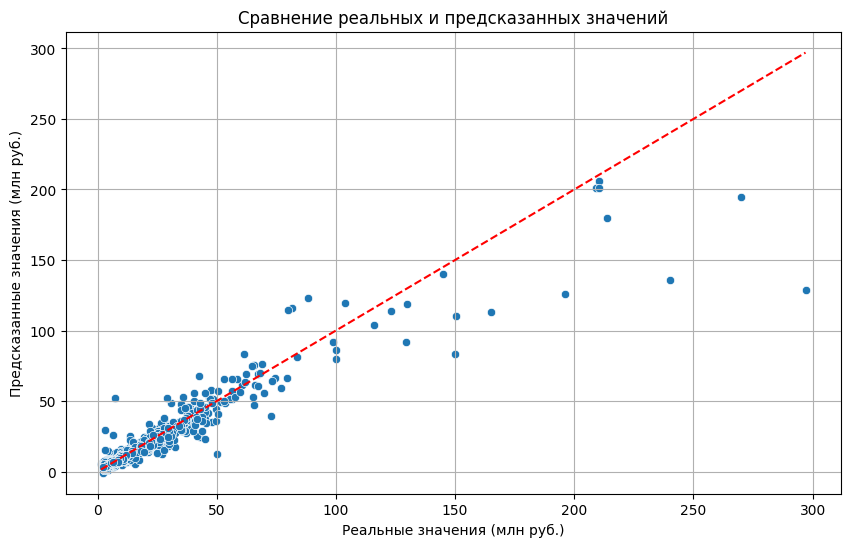

In [ ]:
# Оценка работы модели
evaluate_model(
    model,   # Нейронная сеть для оценки
    X_test,  # Тестовые данные
    y_test,  # Метки тестовых данных
    scaler_price,  # Скейлер для обратного преобразования нормализованных значений
    mean_price  # Средняя цена на всей выборке данных
)

Мы успешно применили нейронную сеть для предсказания стоимости квартир на основе данных об однокомнатных квартирах стоимостью до 300 млн рублей. В процессе работы мы выполнили все ключевые этапы: от подготовки данных и их загрузки до настройки модели, ее обучения и оценки производительности.

Мы начали с очистки и предобработки данных, нормализовали числовые признаки и использовали кодирование категориальных переменных. Затем мы определили архитектуру нейронной сети, выбрали функцию потерь и оптимизатор. После этого мы обучили модель на тренировочных данных, используя метод раннего прекращения для предотвращения переобучения.

Наконец, мы оценили производительность модели на тестовых данных, вычислили среднюю абсолютную ошибку (MAE) и визуализировали предсказания модели в сравнении с реальными значениями. Этот процесс демонстрирует, как можно эффективно использовать нейронные сети в PyTorch для решения задач регрессии, таких как предсказание стоимости недвижимости.